In [1]:
# Import pandas as a alias 'pd'
import pandas as pd


# Load the CSV file "USA_Housing.csv"
heart = pd.read_csv("./Desktop/Data Science/csv_file/heart.csv")

heart.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [2]:
from sklearn.model_selection import train_test_split
X = heart[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y = heart[['target']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [3]:
dfX = pd.DataFrame(X_test)
dfy = pd.DataFrame(y_test, columns=["target"])

In [4]:
df = pd.concat([dfX, dfy], axis=1)

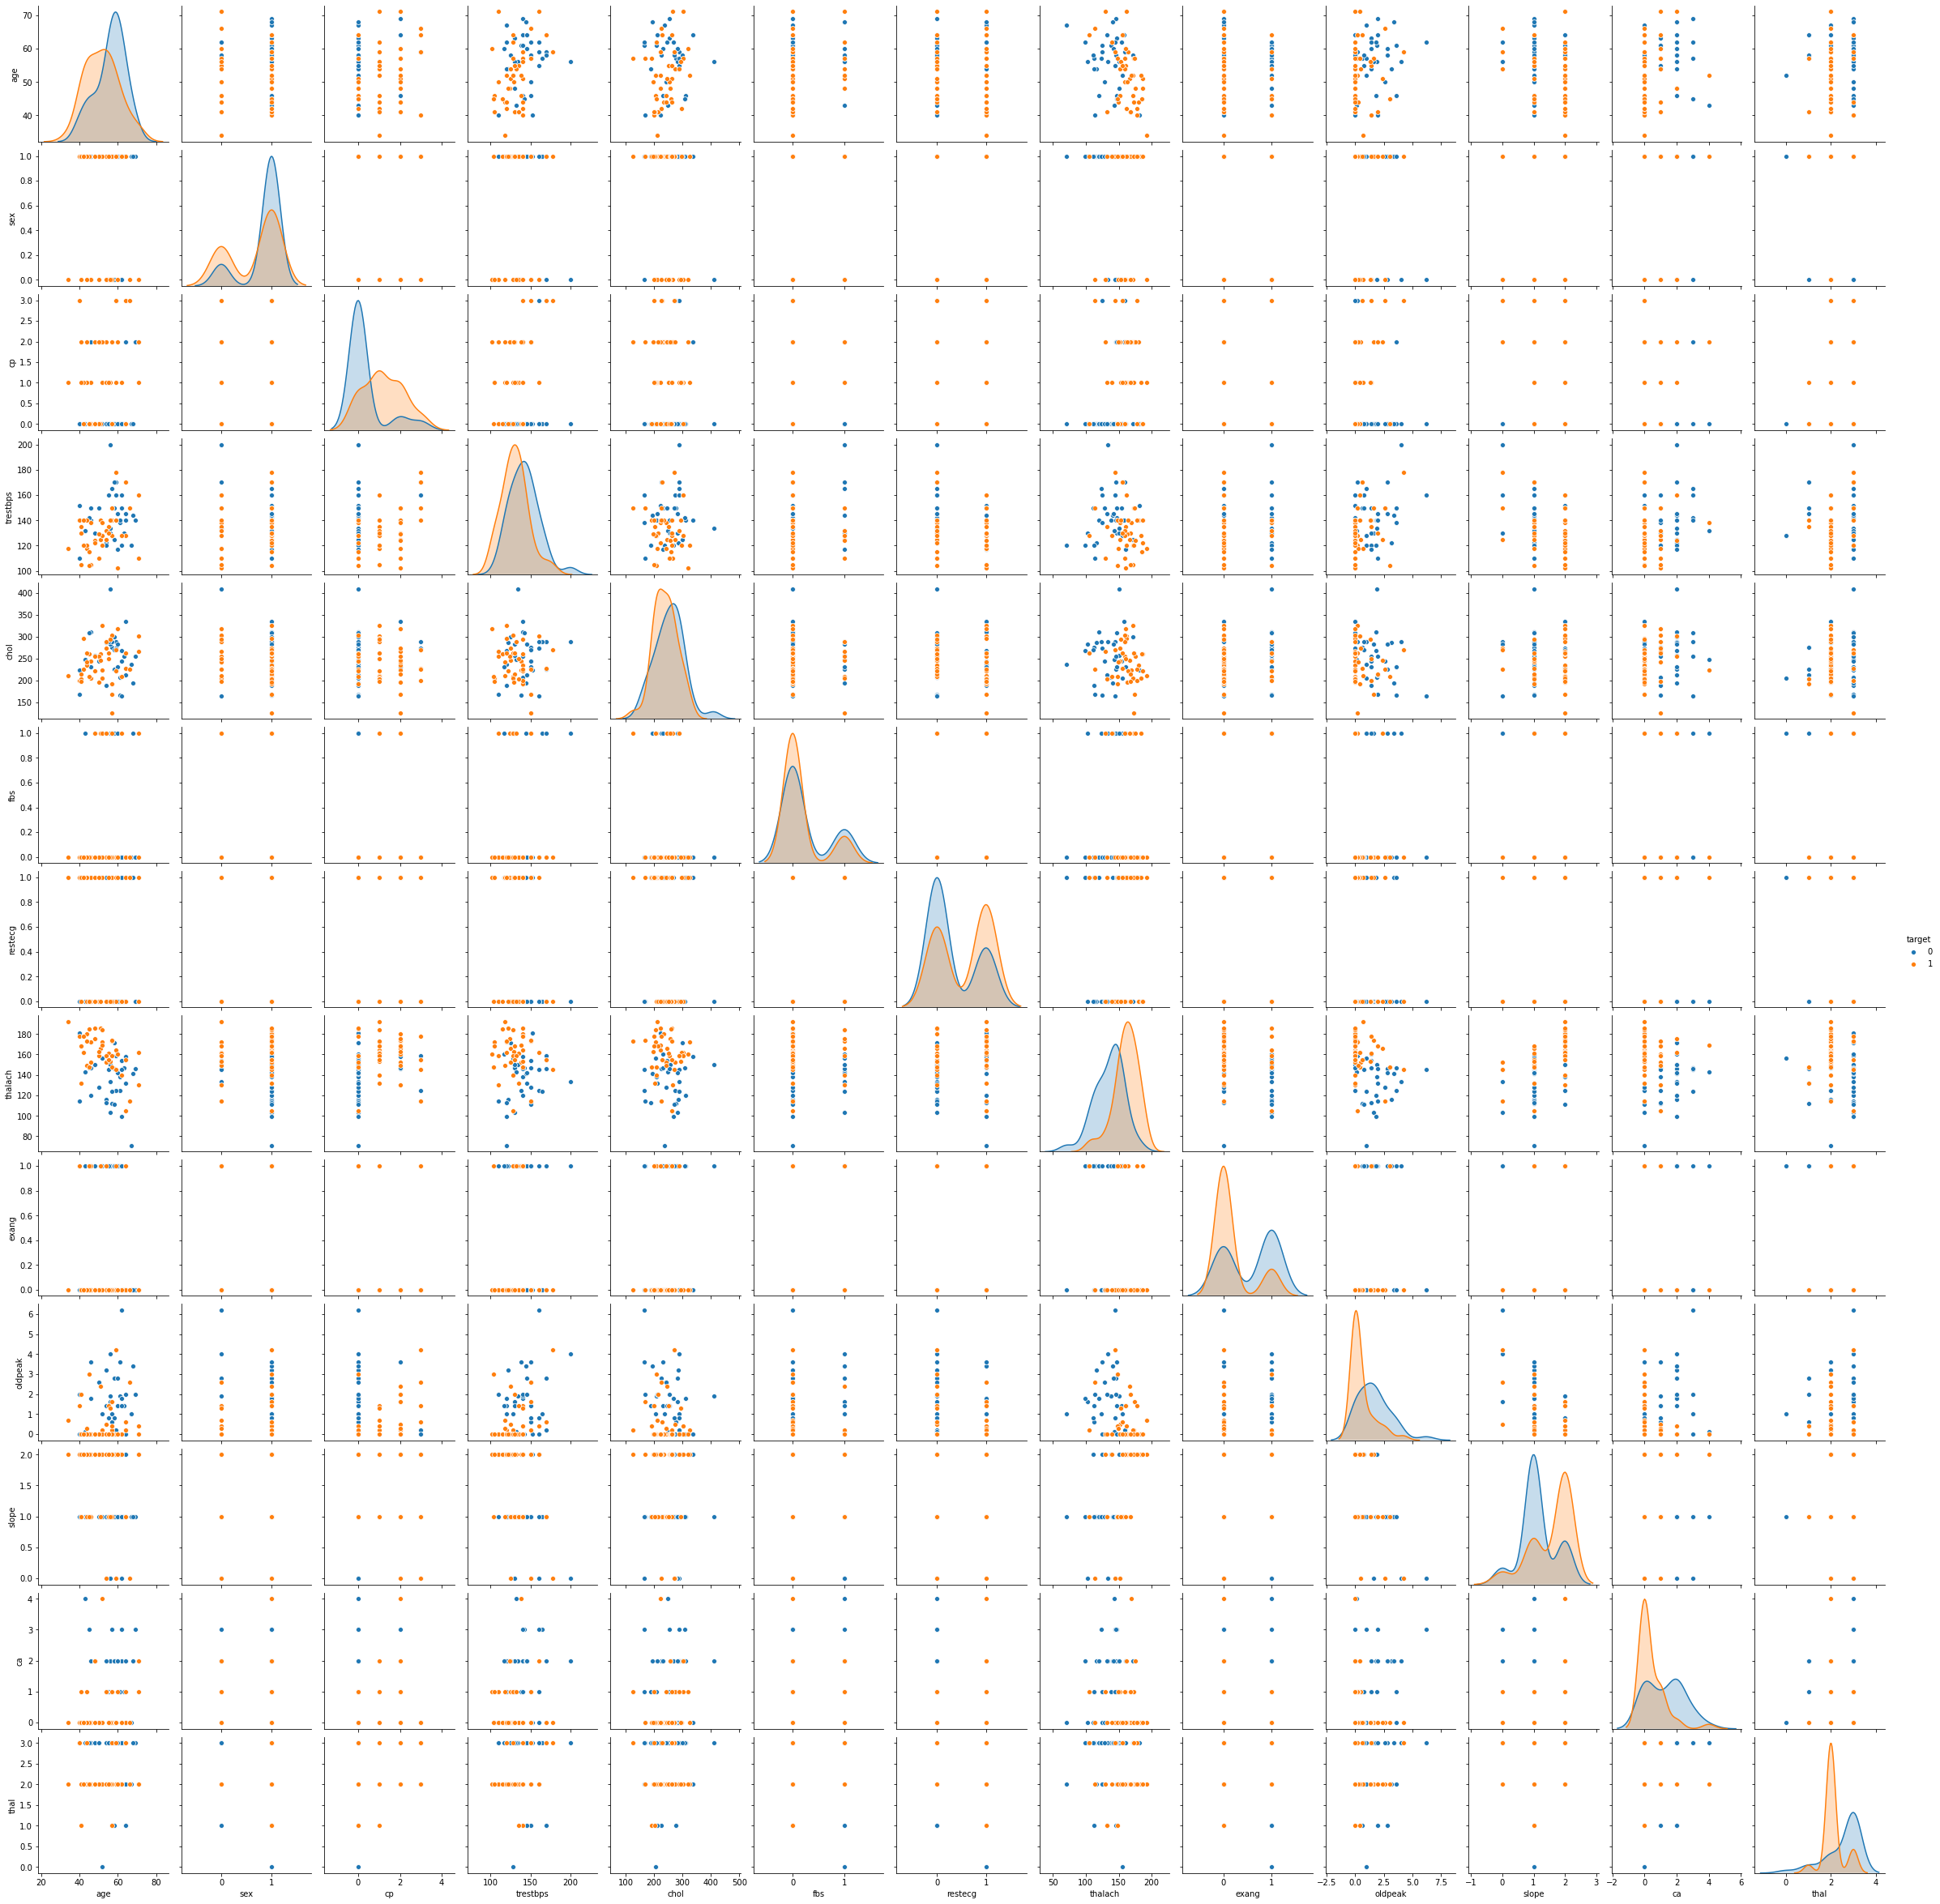

In [5]:
import seaborn as sns
import matplotlib.pylab as plt

sns.pairplot(df, hue="target")
plt.show()

In [5]:
X = X.drop(['trestbps', 'chol', 'fbs'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [6]:
from sklearn.tree import DecisionTreeClassifier

# decision tree 학습
tree = DecisionTreeClassifier().fit(X_train, y_train)

In [7]:
# X_test에 대한 예측값 저장
y_train_hat = tree.predict(X_train)
y_test_hat = tree.predict(X_test)

In [8]:
import numpy as np

# column 값 저장
feature_names = X.columns.tolist()
target_name = np.array(['0', '1'])

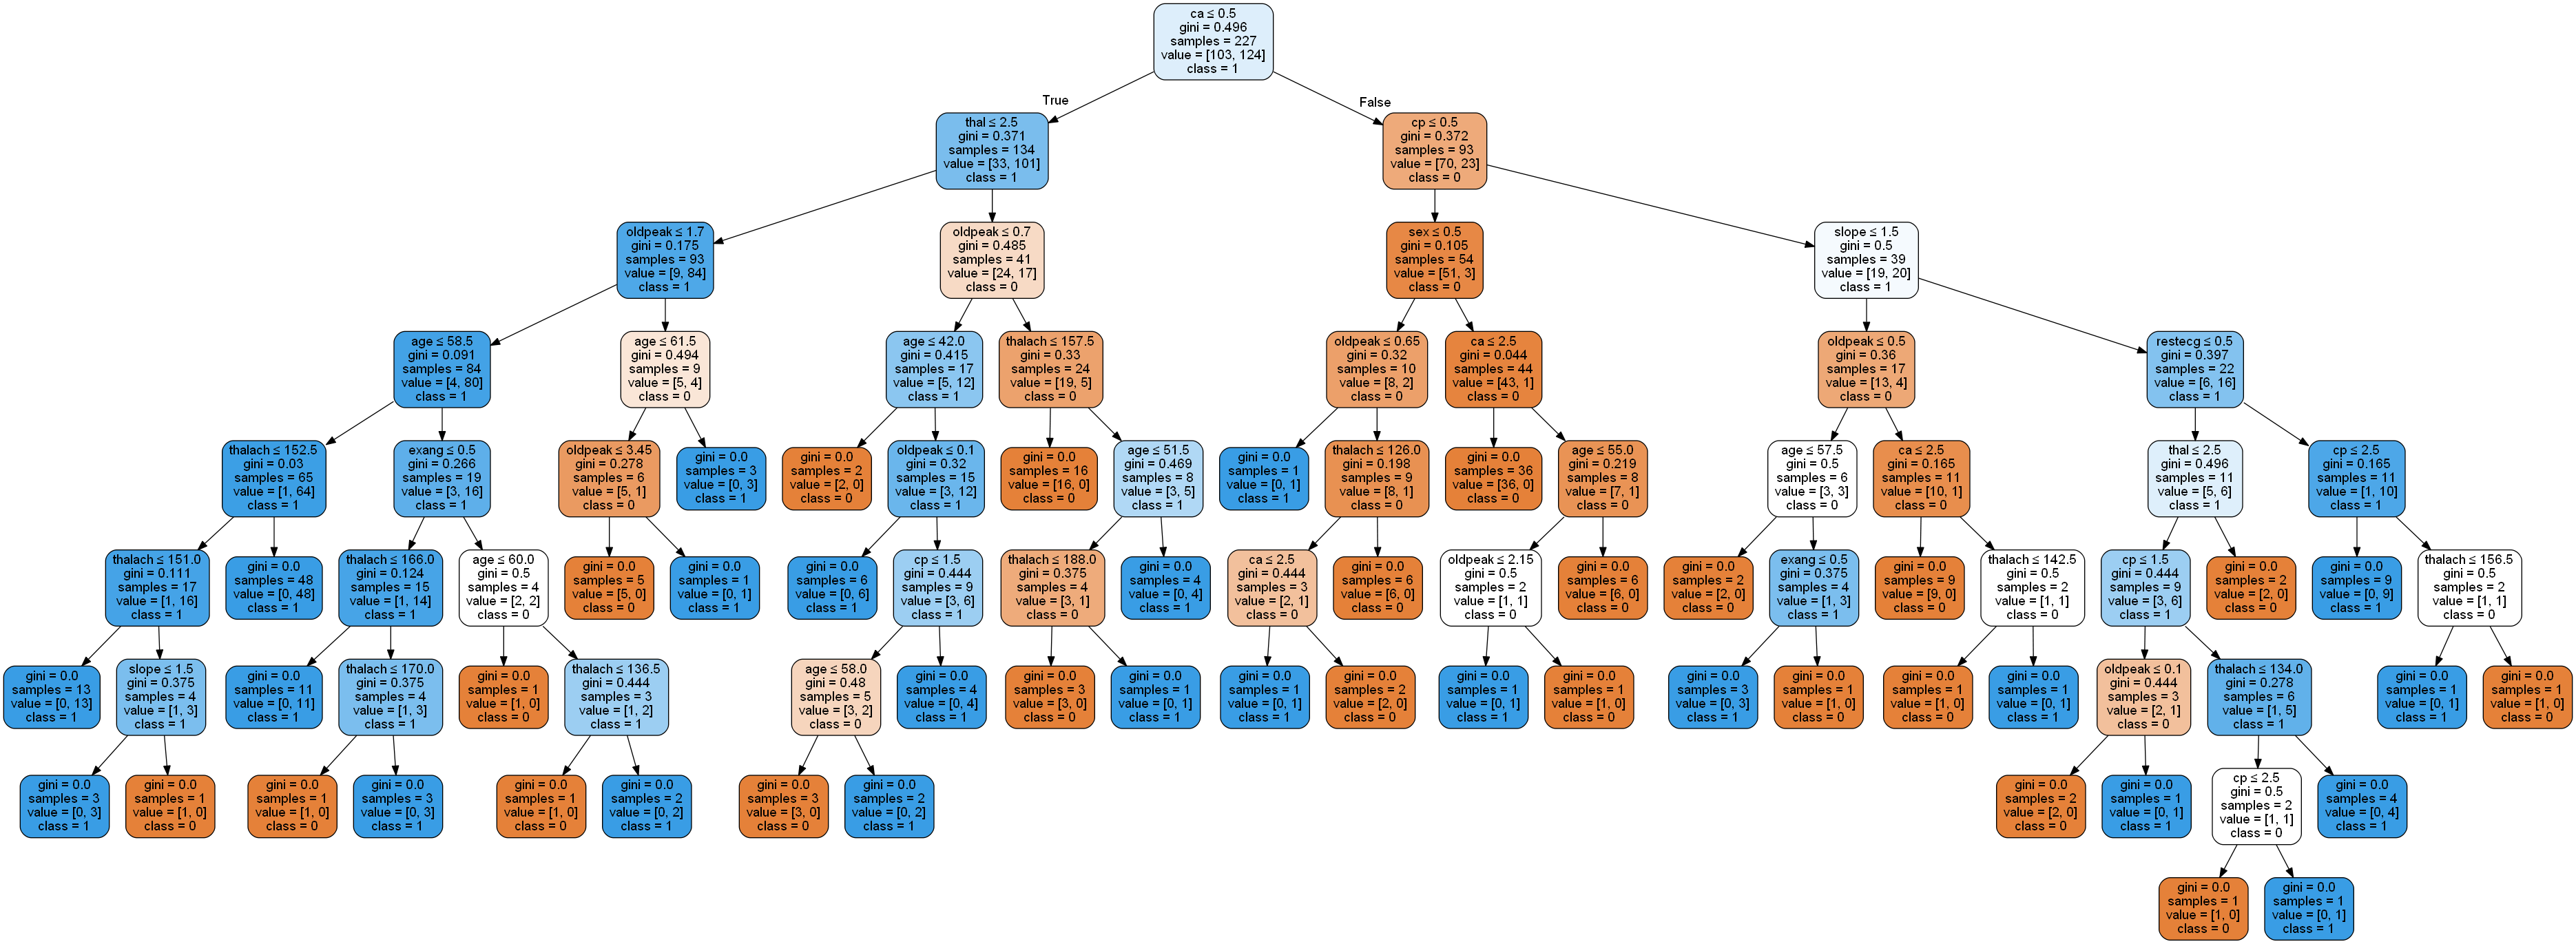

In [9]:
import io
import pydot
from IPython.core.display import Image
from sklearn.tree import export_graphviz

# Draw Decision Tree
def draw_decision_tree(model):
    dot_buf = io.StringIO()
    export_graphviz(model, out_file=dot_buf,
                   feature_names = feature_names,
                   class_names = target_name,
                    filled = True, rounded =True,
                    special_characters = True)
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0]
    image = graph.create_png()
    return Image(image)

draw_decision_tree(tree)

In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_hat, target_names = target_name))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00       124

    accuracy                           1.00       227
   macro avg       1.00      1.00      1.00       227
weighted avg       1.00      1.00      1.00       227



In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_hat, target_names = target_name))

              precision    recall  f1-score   support

           0       0.69      0.71      0.70        35
           1       0.75      0.73      0.74        41

    accuracy                           0.72        76
   macro avg       0.72      0.72      0.72        76
weighted avg       0.72      0.72      0.72        76



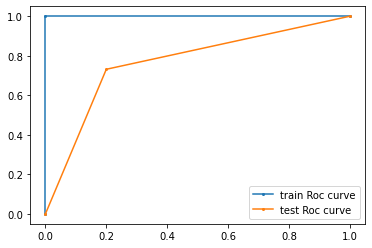

In [53]:
from sklearn.metrics import roc_curve
import matplotlib.pylab as plt

fpr1, tpr1, thresholds1 = roc_curve(y_train, y_train_hat)
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_test_hat)

plt.plot(fpr1, tpr1, 'o-', ms=2, label="train Roc curve")
plt.plot(fpr2, tpr2, 'o-', ms=2, label="test Roc curve")
plt.legend()

plt.show()

In [33]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0).fit(X,y)

In [34]:
import io
import pydot
from IPython.core.display import Image
from sklearn.tree import export_graphviz

def draw_decision_tree(model):
    dot_buf = io.StringIO()
    export_graphviz(model, out_file=dot_buf)
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0]
    image = graph.create_png()
    return Image(image)

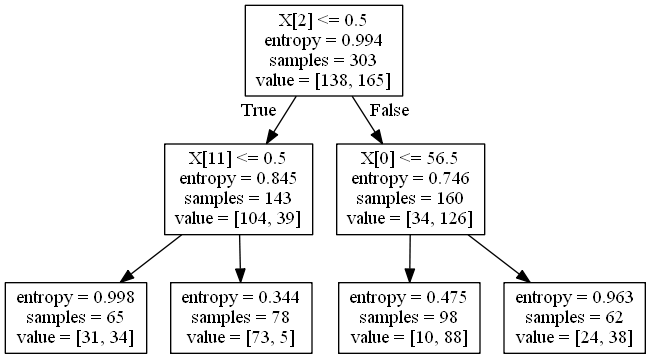

In [35]:
import numpy as np
import matplotlib as mpl

def plot_decision_regions(X, y, model, title):
    resolution = 0.01
    markers = ('s', '^', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = mpl.colors.ListedColormap(colors)
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = model.predict(
    np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    
    plt.contour(xx1, xx2, Z, cmap=mpl.colors.ListedColormap(['k']))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,
                   c=[cmap(idx)], marker=markers[idx], s=80, label=cl)
    
    plt.ylabel('target')
    plt.legend(loc='upper left')
    
    return Z

draw_decision_tree(tree)

In [12]:
plot_decision_regions(X, y, tree, "Depth 2")
plt.show()

TypeError: '(slice(None, None, None), 0)' is an invalid key